In [ ]:
''' 
Лабораторная работа №1. Построение линейной регрессионной модели
 1. Предоставлен набор данных — наблюдения за погодой (Weather in Szeged 2006-2016 | Kaggle)
 2. Данные включают в себя время, описание, тип осадков, температуру, ощущаемую температуру, влажность, скорость ветра, направление ветра, видимость, давление
 3. Необходимо построить регрессионную модель, которая принимает на вход сведения о влажности, выдает ощущаемую температуру
 4. Необходимо визуализировать данные и линию регрессии при помощи диаграммы рассеяния
 5. Усложнить регрессионную модель, добавив к влажности параметр скорости ветра. На выходе дать ощущаемую температуру.
 6. Визуализировать модель.
 7. Написать консольный текстовый стенд, демонстрирующий предсказание ощущаемой температуры по влажности и по влажности и скорости ветра

Методические указания
 1. Использовать класс LinearRegression из Scikit-learn
 2. Данные загрузить через DataFrame, проследить за корректными dtypes
 3. Использовать seaborn при построении диаграмм
 4. При обучении модели использовать train_test_split из Scikit-learn
 5. В качестве отчета загрузить в репозиторий ноутбук или .py-файл с комментариями
'''

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score

In [2]:
data = pd.read_csv('weatherHistory.csv') # Загрузка данных из weatherHistory.csv
print(data.head(1)) # Просмотр первой строки данных
print('dtypes:')
print(data.dtypes) # Вывод типов данных
data = data[['Humidity', 'Apparent Temperature (C)', 'Wind Speed (km/h)']] # Выбор необходимых столбцов
data.dropna(inplace=True)  # Удаление строк с отсутствующими данными

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   

                       Daily Summary  
0  Partly cloudy throughout the day.  
dtypes:
Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


R^2: 0.3676953518941525


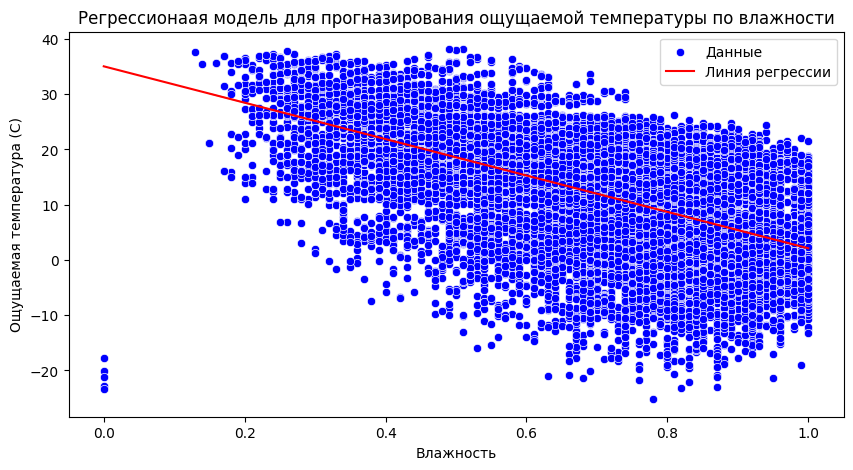

In [3]:
# 1 модель: принимает на вход сведения о влажности, выдает ощущаемую температуру
# Разделим данные на обучающую и тестовую выборки
X1 = data[['Humidity']]
Y1 = data['Apparent Temperature (C)']
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.3) # 0.3 (30%) — это доля данных, выделяемая под тестовую выборку
# Создание и обучение модели
model1 = LinearRegression() # создание модели линейной регрессии
model1.fit(X_train1, Y_train1) # обучение модели линейной регрессии
Y_pred1 = model1.predict(X_test1) # предсказание значений ощущаемой температуры по тестовой выборке
# Оценка модели с помощью R^2
print(f'R^2: {r2_score(Y_test1, Y_pred1)}')
# Визуализация
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_test1['Humidity'], y=Y_test1, color='blue', label='Данные') # cоздает точечную диаграмму по данным
sns.lineplot(x=X_test1['Humidity'], y=Y_pred1, color='red', label='Линия регрессии') # cоздает линию регрессии
plt.title('Регрессионаая модель для прогназирования ощущаемой температуры по влажности')
plt.xlabel('Влажность')
plt.ylabel('Ощущаемая температура (С)')
plt.legend()
plt.show()

R^2: 0.4052558352097674


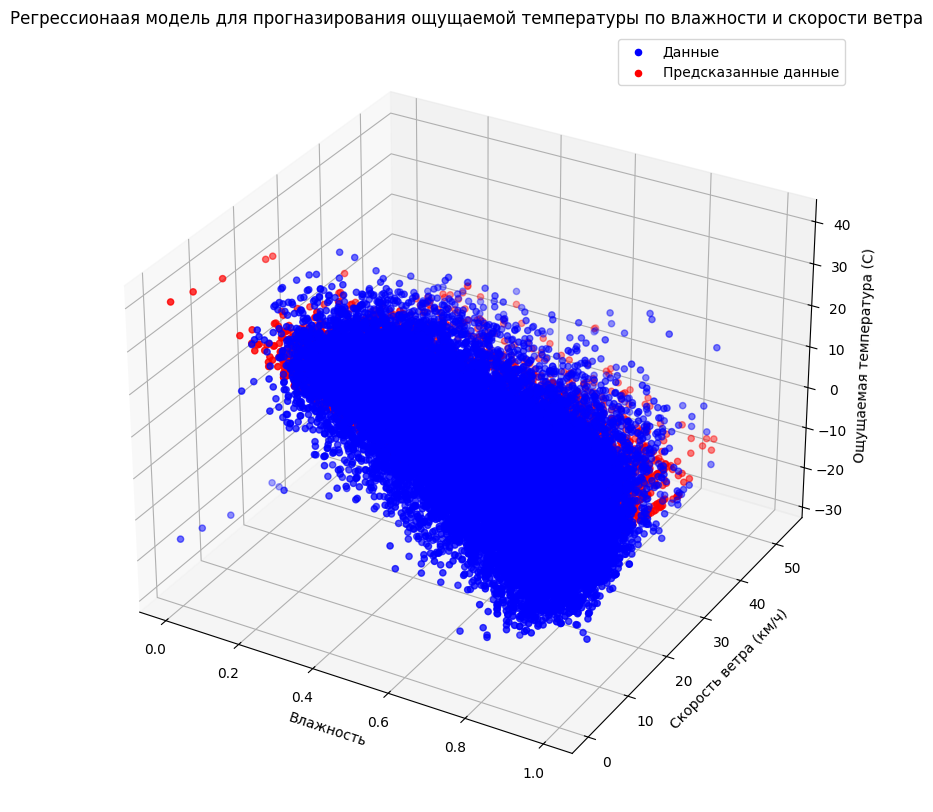

In [4]:
# 2 модель: принимает на вход сведения о влажности и скорости ветра, выдает ощущаемую температуру
# Разделим данные на обучающую и тестовую выборки
X2 = data[['Humidity', 'Wind Speed (km/h)']]
Y2 = data['Apparent Temperature (C)']
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3) # 0.3 (30%) — это доля данных, выделяемая под тестовую выборку
# Создание и обучение модели
model2 = LinearRegression() # создание модели линейной регрессии
model2.fit(X_train2, Y_train2) # обучение модели линейной регрессии
Y_pred2 = model2.predict(X_test2) # предсказание значений ощущаемой температуры по тестовой выборке
# Оценка модели с помощью R^2
print(f'R^2: {r2_score(Y_test2, Y_pred2)}')
# Визуализация
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test2['Humidity'], X_test2['Wind Speed (km/h)'], Y_test2, color='blue', label='Данные')
ax.scatter(X_test2['Humidity'], X_test2['Wind Speed (km/h)'], Y_pred2, color='red', label='Предсказанные данные')  
ax.set_xlabel('Влажность')
ax.set_ylabel('Скорость ветра (км/ч)')
ax.set_zlabel('Ощущаемая температура (С)')
plt.title('Регрессионаая модель для прогназирования ощущаемой температуры по влажности и скорости ветра')
plt.legend()
plt.show()


In [6]:
# Консольный текстовый стенд, демонстрирующий предсказание ощущаемой температуры по влажности и по влажности и скорости ветра
T=1
while (T==1):
    print("\nПредсказание ощущаемой температуры по влажности / по влажности и скорости ветра")
    print("Введите цифру команды (0-2):")
    print("1 - Предсказание ощущаемой температуры по влажности")
    print("2 - Предсказание ощущаемой температуры по влажности и скорости ветра")
    print("0 - Выход")
    command = input("Введите команду: ")
    if (command == '0'):
        print("Выход из программы.")
        T=0
    elif (command == '1'):
        print("Предсказание ощущаемой температуры по влажности.")
        Humidity1= float(input("Введите влажность (от 0 до 1 (пример: 0.2)): "))
        input1 = pd.DataFrame([[Humidity1]], columns=['Humidity'])
        pred1 = model1.predict(input1)
        print(f"Предсказанная ощущаемая температура: ", pred1, " С, при влажности:", Humidity1)
    elif (command == '2'):
        print("Предсказание ощущаемой температуры по влажности и скорости ветра.")
        Humidity2 = input("Введите влажность (от 0 до 1 (пример: 0.2)): ")
        Wind_Speed2 = input("Введите скорость ветра: ")
        input2 = pd.DataFrame([[Humidity2, Wind_Speed2]], columns=['Humidity', 'Wind Speed (km/h)'])
        pred2 = model2.predict(input2)
        print(f"Предсказанная ощущаемая температура: ", pred2, " С, при влажности:", Humidity2, " и скорости ветра:", Wind_Speed2, "км/ч")
    else:
        print("Ошибка: Неверный ввод. выберите команду из списка!")


Предсказание ощущаемой температуры по влажности / по влажности и скорости ветра
Введите цифру команды (0-2):
1 - Предсказание ощущаемой температуры по влажности
2 - Предсказание ощущаемой температуры по влажности и скорости ветра
0 - Выход
Предсказание ощущаемой температуры по влажности.
Предсказанная ощущаемая температура:  [28.44558364]  С, при влажности: 0.2

Предсказание ощущаемой температуры по влажности / по влажности и скорости ветра
Введите цифру команды (0-2):
1 - Предсказание ощущаемой температуры по влажности
2 - Предсказание ощущаемой температуры по влажности и скорости ветра
0 - Выход
Предсказание ощущаемой температуры по влажности и скорости ветра.
Предсказанная ощущаемая температура:  [26.95395687]  С, при влажности: 0.2  и скорости ветра: 20 км/ч

Предсказание ощущаемой температуры по влажности / по влажности и скорости ветра
Введите цифру команды (0-2):
1 - Предсказание ощущаемой температуры по влажности
2 - Предсказание ощущаемой температуры по влажности и скорости в